# Using simple linear regression to model OLED

In this model, we are going to make a simple linear model based on the data that we see on features.
First, we import some libraries that we are using.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

In [2]:
# Read the data from excel using Pandas and assign features to X and efficiency to y.
df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='Sheet3')
df = df.fillna(value=0)
X = df[list(df.columns)[:-4]]
y = df.iloc[:, -1:]

In [3]:
# preprocess the data and split the data for training and testing
# assign random state for reproducibility
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2793)

# take a look at the data after scaling
X[:3]

array([[ -2.23033912e-02,  -4.98413691e-01,   9.21990028e-01,
         -4.11721737e-02,   4.51528379e-01,  -4.49345937e-01,
          1.18649024e+00,   1.24324381e+00,   6.37022057e-01,
         -3.03840315e+00,  -1.14215240e+00,  -1.18600148e-01,
          1.66806590e+00,   1.83229014e+00,   6.53047156e-01,
          2.60250289e-01,   5.47839737e-02,  -4.00278067e-01,
          7.70726145e-02,  -3.71816946e-04,   1.70383325e+00],
       [  1.69697789e+00,   1.73119110e+00,  -7.40952194e-01,
         -4.11721737e-02,   4.51528379e-01,   6.15038823e-01,
         -8.17972226e-01,  -8.19099471e-01,  -4.66391149e-01,
         -8.90664957e-01,  -4.82873735e-01,  -5.01818479e-01,
         -5.34885743e-01,  -5.40728859e-01,  -4.39117915e-01,
          1.60131339e-01,   3.54166816e-01,   8.13064825e-01,
          9.69734538e-01,   1.79959402e-01,  -1.71591718e-01],
       [ -7.38670590e-01,  -4.46562417e-01,  -7.40952194e-01,
         -4.11721737e-02,   3.52549277e-01,   2.21161596e+00,
      

In [4]:
# Choose linear regression as our regressor from scikit-learn
regressor = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)

regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))

R-squared:  0.543393637374


In [5]:
# see the coefficient of regression
coefficients = regressor.coef_
intercept = regressor.intercept_
print('regression coefficient =\n', coefficients)
print('regression intercept = ', intercept)


regression coefficient =
 [[   8.49728611  -10.956978      4.99599139   -5.5699197     3.70013692
     6.2472705  -110.36286157  102.17253108    4.900462     -1.05192816
     3.0277114     4.73882626  139.22601199  -97.95691144  -40.74553938
   -10.12284809    9.98639389   10.93481541   -5.98967854    2.40181784
   -12.04009896]]
regression intercept =  [ 24.86201473]


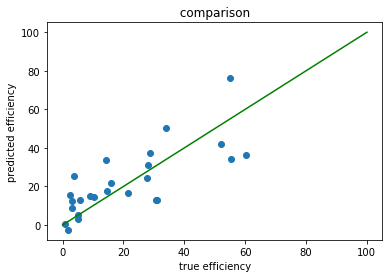

In [6]:
# take a look at our model prediction. the best model will be very close to the line in the middle
plt.scatter(y_test, y_predictions)
plt.plot([0, 100], [-0,100], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' comparison ')
plt.show()

In [7]:
# print predicted value and actual value to see how far off the prediction
y_test = y_test.values.tolist()
for i, prediction in enumerate(y_predictions):
    print('Predicted: %s,  Actual: %s' % (prediction, y_test[i]))

Predicted: [ 0.399343],  Actual: [0.9]
Predicted: [ 24.20575225],  Actual: [27.7]
Predicted: [ 5.45149633],  Actual: [5.09]
Predicted: [ 13.17867166],  Actual: [5.6]
Predicted: [ 14.83458175],  Actual: [9.0]
Predicted: [ 3.15536139],  Actual: [4.92]
Predicted: [ 15.65813988],  Actual: [2.36]
Predicted: [ 14.49800291],  Actual: [10.2]
Predicted: [ 33.66498962],  Actual: [14.3]
Predicted: [ 76.02498307],  Actual: [55.0]
Predicted: [-2.53100512],  Actual: [1.8]
Predicted: [ 12.77856885],  Actual: [30.6]
Predicted: [ 25.36021162],  Actual: [3.78]
Predicted: [ 13.17867166],  Actual: [30.9]
Predicted: [ 42.06574408],  Actual: [52.1]
Predicted: [ 12.34150787],  Actual: [3.12]
Predicted: [ 17.78307186],  Actual: [14.7]
Predicted: [ 8.70949768],  Actual: [3.25]
Predicted: [ 16.55553122],  Actual: [21.4]
Predicted: [ 37.13011275],  Actual: [28.6]
Predicted: [ 50.41416063],  Actual: [34.0]
Predicted: [ 21.79533559],  Actual: [16.01]
Predicted: [ 30.91409532],  Actual: [28.24]
Predicted: [ 36.1913

Using the above model, we get ~0.5 for R squared value. This is pretty bad and can see some improvement by some doing changes. We can do feature selection and maybe leaves some features out of the model. Also, the data for this is quite small and perhaps additional data can help improve the model.

R-squared:  0.703256203821


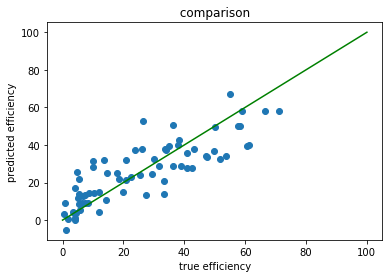

In [8]:
# try to use the data on training data set
regressor.fit(X_train, y_train)
print('R-squared: ', regressor.score(X_train, y_train))

y_predictions = regressor.predict(X_train)
plt.scatter(y_train, y_predictions)
plt.plot([0, 100], [-0,100], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' comparison ')
plt.show()

In [9]:
# Check the cross validation score for the whole model

scores = cross_val_score(regressor, X, y, cv=5)
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [ -0.14527296 -30.35778293   0.50382921   0.15597883  -0.26777624]
mean score:  -6.0222048176


Based on the cross validation score, the model does not do so well on data other than the testing set. This means that linear model is not good for modeling this data. So, next we will look at some non linear approach.   